This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering
4. Interpretation of the clusters

In [1]:
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
PATH = '../2_Data'

In [3]:
# Import data
df_combined_global_details = pd.read_csv(join(PATH,'2_2_Prepared_Data','df_combined_global_details.csv'))
df_combined_global_details.head()

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
1,1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
2,2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
3,3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0
4,4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NaN,NaN,NaN,2018.0


In [4]:
df_combined_global_details['Access to electricity (% of population)'].mean() # Check the mean

78.93370216207748

In [5]:
df_combined_global_details['Access to clean fuels for cooking'].mean() # Check the mean

63.25528735632183

#### imputing value for the missing value in the "Access to electricity (% of population)" and "Access to clean fuels for cooking

In [6]:
df_combined_global_details= df_combined_global_details.fillna(df_combined_global_details['Access to electricity (% of population)'].mean())

In [7]:
df_combined_global_details= df_combined_global_details.fillna(df_combined_global_details['Access to clean fuels for cooking'].mean())

In [8]:
df_combined_global_details.head(10)

,Unnamed: 0,Country,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
0,0,Afghanistan,2000,1.613591,6.20,9.22,2.000000e+04,44.99,0.16,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
1,1,Afghanistan,2001,4.074574,7.20,8.86,1.300000e+05,45.60,0.09,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
2,2,Afghanistan,2002,9.409158,8.20,8.47,3.950000e+06,37.83,0.13,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
3,3,Afghanistan,2003,14.738506,9.50,8.09,2.597000e+07,36.66,0.31,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
4,4,Afghanistan,2004,20.064968,10.90,7.75,7.893370e+01,44.24,0.33,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
5,5,Afghanistan,2005,25.390894,12.20,7.51,9.830000e+06,33.88,0.34,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
6,6,Afghanistan,2006,30.718690,13.85,7.40,1.062000e+07,31.89,0.20,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
7,7,Afghanistan,2007,36.051010,15.30,7.25,1.575000e+07,28.78,0.20,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
8,8,Afghanistan,2008,42.400000,16.70,7.49,1.617000e+07,21.17,0.19,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0
9,9,Afghanistan,2009,46.740050,18.40,7.50,9.960000e+06,16.53,0.16,0.0,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-...,1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",78.933702,78.933702,78.933702,2018.0


In [9]:
#Select numeric columns
numeric_cols = df_combined_global_details.select_dtypes(include='number').columns

In [10]:
#detect columns with commas
cols_with_commas=[]
for col in numeric_cols:
    if df_combined_global_details[col].astype(str).str.contains(',').any():
        cols_with_commas.append(col)

In [11]:
print(cols_with_commas)

[]


In [12]:
df_cluster = df_combined_global_details[numeric_cols]

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Rate of variation for the given cluster option
score

[-1.4652892754510689e+20,
 -5.915489959472714e+19,
 -3.1151171468960666e+19,
 -1.5619287161562102e+19,
 -1.0354487111070396e+19,
 -6.427396540583453e+18,
 -4.705993523945849e+18,
 -3.355956183324689e+18,
 -3.097758489588886e+18]

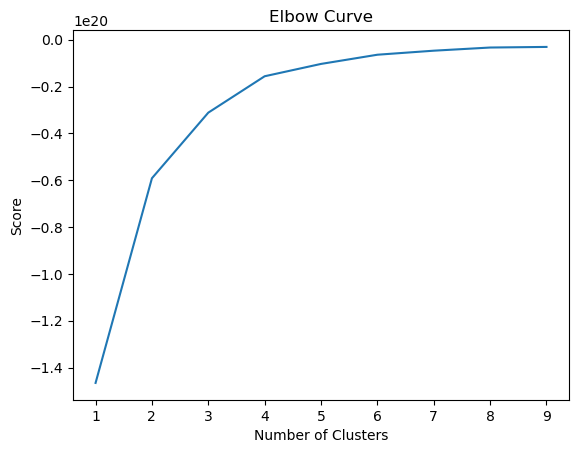

In [15]:
# Plot the elbow curve

plt.plot(num_cl,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### 4.Make an Informed Decision about Number of Clusters

### Based on the elbow plot, the optimal number of clusters appears to be 4 because the curve starts to flatten around 4 clusters.

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

KMeans(n_clusters=4)

In [18]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_23540\2810219287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [19]:
df_cluster.head()

,Unnamed: 0,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude,National accounts reference year,Latest industrial data,Latest trade data,clusters
0,0,2000,1.613591,6.2,9.22,2.000000e+04,44.99,0.16,0.0,0.31,...,78.933702,78.933702,78.933702,652230.0,33.93911,67.709953,78.933702,78.933702,2018.0,0
1,1,2001,4.074574,7.2,8.86,1.300000e+05,45.60,0.09,0.0,0.50,...,78.933702,78.933702,78.933702,652230.0,33.93911,67.709953,78.933702,78.933702,2018.0,0
2,2,2002,9.409158,8.2,8.47,3.950000e+06,37.83,0.13,0.0,0.56,...,78.933702,78.933702,179.426579,652230.0,33.93911,67.709953,78.933702,78.933702,2018.0,0
3,3,2003,14.738506,9.5,8.09,2.597000e+07,36.66,0.31,0.0,0.63,...,78.933702,8.832278,190.683814,652230.0,33.93911,67.709953,78.933702,78.933702,2018.0,0
4,4,2004,20.064968,10.9,7.75,7.893370e+01,44.24,0.33,0.0,0.56,...,78.933702,1.414118,211.382074,652230.0,33.93911,67.709953,78.933702,78.933702,2018.0,0


In [20]:
df_cluster['clusters'].value_counts()

clusters
0    3468
1     153
2      25
3       3
Name: count, dtype: int64

### Create Visualizations of the Clustered Data

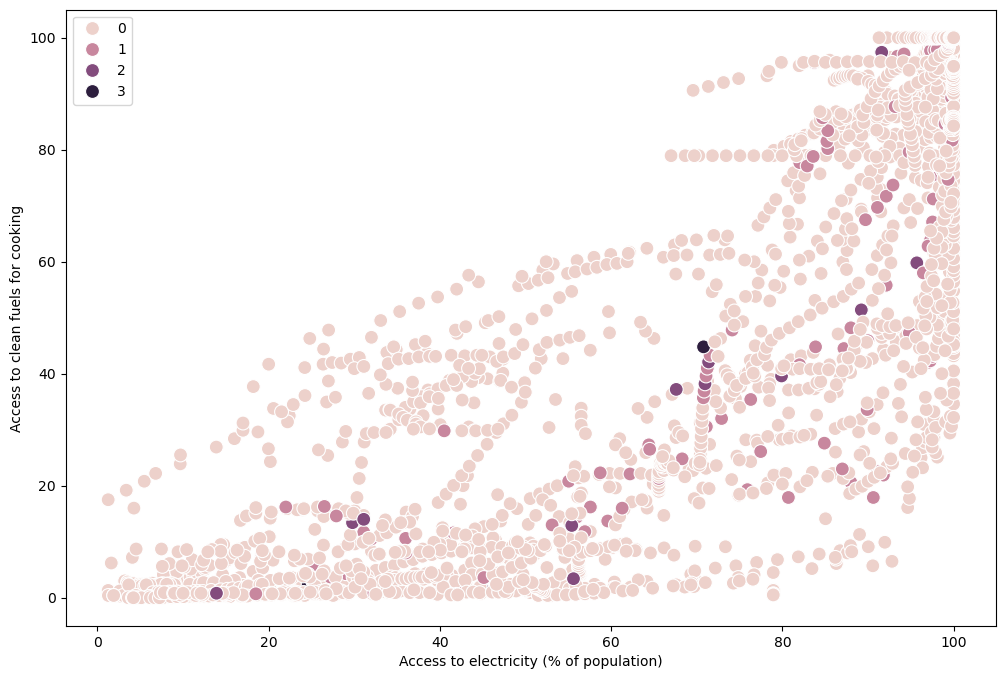

In [21]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Access to electricity (% of population)'], y=df_cluster['Access to clean fuels for cooking'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Access to electricity (% of population)') # Label x-axis.
plt.ylabel('Access to clean fuels for cooking') # Label y-axis.
plt.show()

In [ ]:
### Perform additional k-means clustering analyses focusing on the top 5 conditions identified in the previous exercises:

Renewable-electricity-generating-capacity-per-capita
Financial flows to developing countries (US $)
gdp_growth



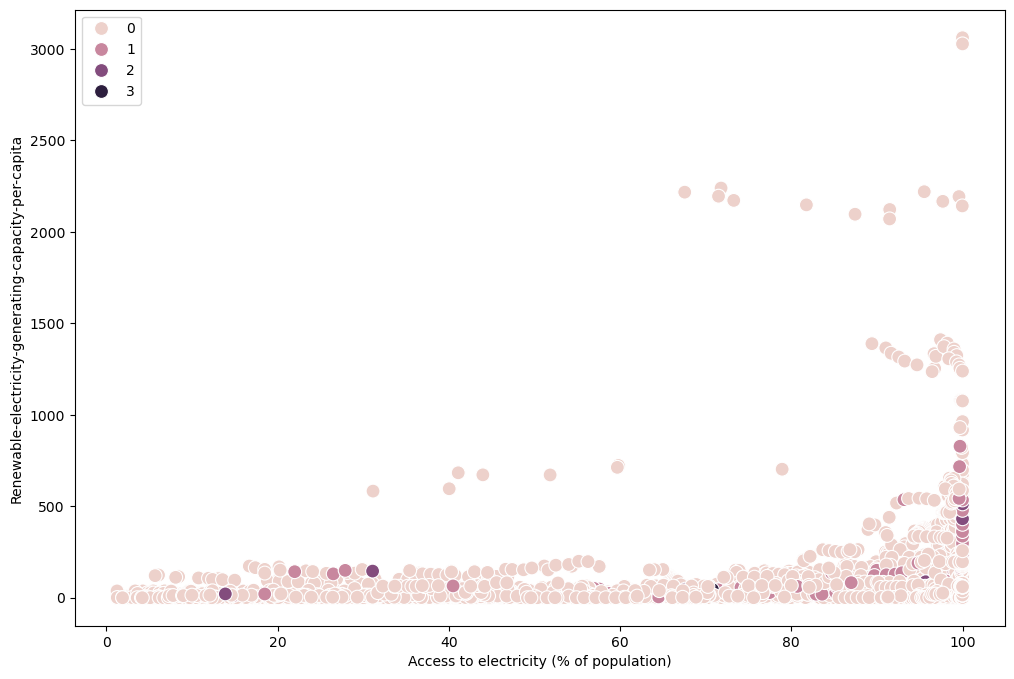

In [22]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Access to electricity (% of population)'], y=df_cluster['Renewable-electricity-generating-capacity-per-capita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Access to electricity (% of population)') # Label x-axis.
plt.ylabel('Renewable-electricity-generating-capacity-per-capita') # Label y-axis.
plt.show()

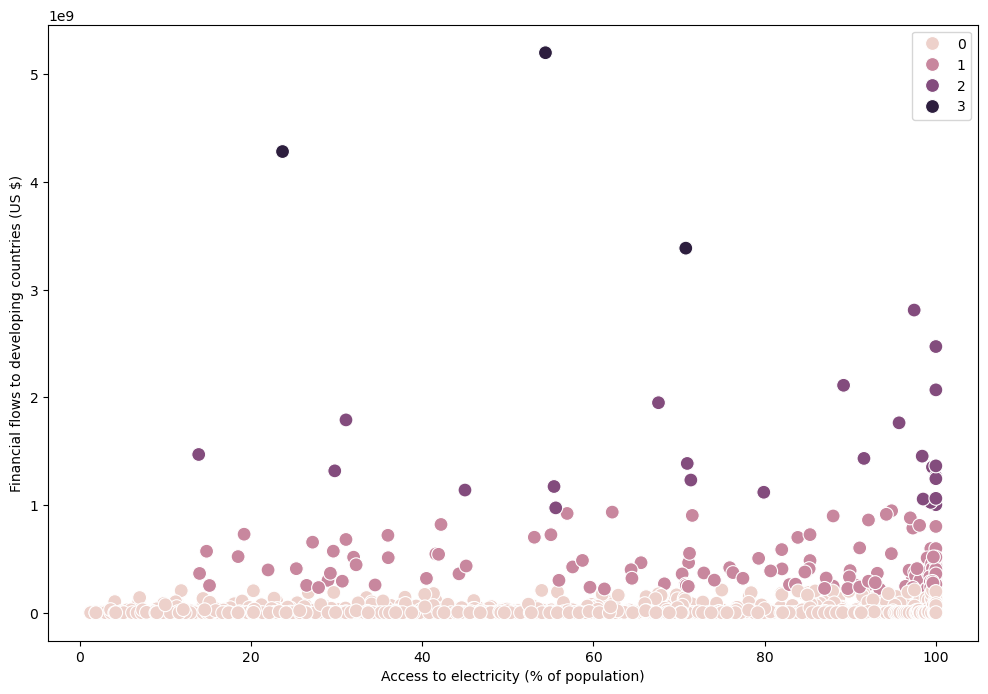

In [23]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Access to electricity (% of population)'], y=df_cluster['Financial flows to developing countries (US $)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Access to electricity (% of population)') # Label x-axis.
plt.ylabel('Financial flows to developing countries (US $)') # Label y-axis.
plt.show()

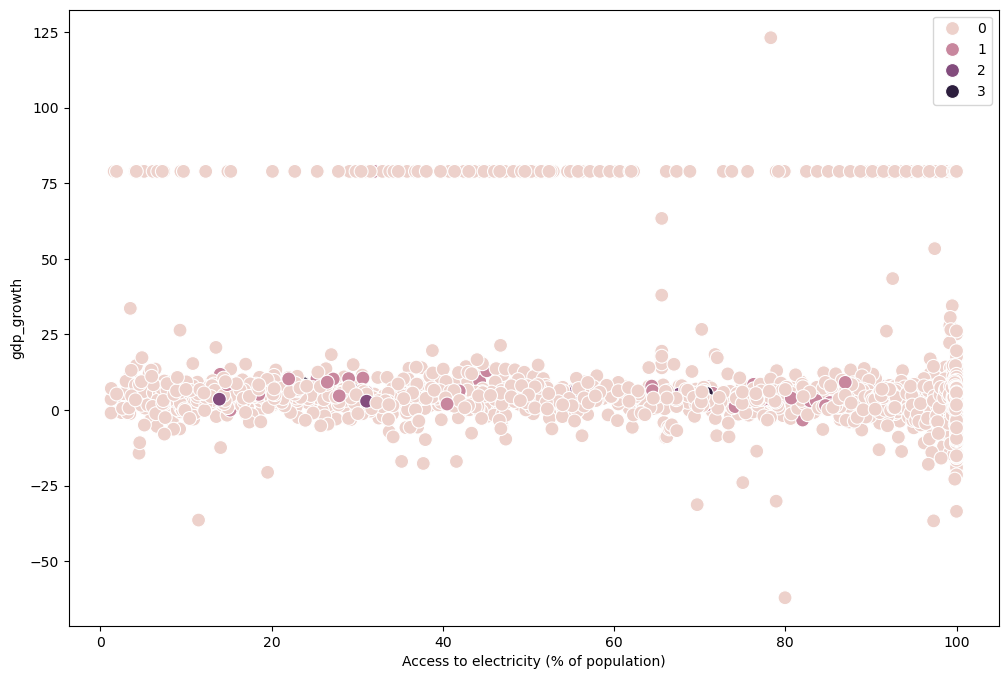

In [26]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['Access to electricity (% of population)'], y=df_cluster['gdp_growth'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Access to electricity (% of population)') # Label x-axis.
plt.ylabel('gdp_growth') # Label y-axis.
plt.show()

In [24]:
df_cluster.loc[df_cluster['clusters'] == 3, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'light pink'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\TOSIN\AppData\Local\Temp\ipykernel_23540\407439757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.loc[df_cluster['clusters'] == 3, 'cluster'] = 'dark purple'


In [25]:
df_cluster.groupby('cluster').agg({'Access to electricity (% of population)':['mean', 'median'], 
                         'Access to clean fuels for cooking':['mean', 'median'], 
                         'Renewable-electricity-generating-capacity-per-capita':['mean', 'median'],
                          'gdp_growth':['mean', 'median']})

Access to electricity (% of population)            \
                                               mean    median   
cluster                                                         
dark purple                               49.626680  54.40000   
light pink                                79.740981  92.13537   
pink                                      78.918487  98.57880   
purple                                    79.620609  95.70000   

            Access to clean fuels for cooking         \
                                         mean median   
cluster                                                
dark purple                         18.466667    8.7   
light pink                          57.661765   67.5   
pink                                64.318439   79.8   
purple                              61.368000   70.6   

            Renewable-electricity-generating-capacity-per-capita         \
                                                            mean median   
cluster                                                                   
dark purple                                          24.150000    16.91   
light pink                                          137.792876    58.78   
pink                                                102.597237    71.94   
purple                                              161.320800    62.68   

            gdp_growth            
                  mean    median  
cluster                           
dark purple   5.054239  5.554277  
light pink    7.250924  4.939715  
pink         10.123997  3.867928  
purple       10.194115  4.731147

## Interpretation/Discuss of the Clusters

### The clusters group data points with Access to electricity and similar other energy-related amenities. 
 
### Cluster 0 is the largest, indicating most data points both high and low numbers of the population have access to electricity. 

### Clusters 1 and 2 represent groups representing populations with very low Access to electricity and similar other energy-related amenities.

### Clusters 3  groups representing populations with extremely very low Access to electricity and similar other energy-related amenities.

### The clusters can be interpreted meaningfully in the context of access to electricity :

#### Cluster 0 represents High access to electricity & similar other energy-related amenities
#### Cluster 1 & 2   represents low access to electricity & similar other energy-related amenities
#### Cluster 3 represents shallow access to electricity & similar other energy-related amenities
  

### Descriptive Statistics

#### The mean values  Access to electricity and similar other energy-related amenities increase progressively from Cluster 0 to Cluster 2, highlighting the gradient of the cluster across different clusters.

